In [71]:
import pandas as pd
import os
import glob
import re

In [89]:
def get_top_k_res(dataset:str):
    res_path = f'results/top_k/{dataset}'
    pattern = os.path.join(res_path, '*results.csv')
    res_files = glob.glob(pattern)
    df_dict = {}
    for file in res_files:
        match = re.search(r'triples_(\d+)_results\.csv', file)
        top_k = match.group(1)
        df = pd.read_csv(file,usecols=['Accuracy','Precision','Recall','F1 score'])
        df_dict[top_k] = df
    df_list = [df.assign(top_k=int(key)) for key, df in df_dict.items()]

    # Concatenate all DataFrames vertically (row-wise)
    res_df = pd.concat(df_list, ignore_index=True)
    res_df = res_df.sort_values(by='top_k', ascending=True)
    return res_df

In [91]:
wn_df = get_top_k_res('wordnet')
codex_df = get_top_k_res('codex-m')
fb_df = get_top_k_res('freebase')

In [100]:
wn_df

,Accuracy,Precision,Recall,F1 score,top_k
2,0.916,0.906250,0.928,0.916996,1
4,0.912,0.884328,0.948,0.915058,2
6,0.886,0.853480,0.932,0.891013,3
3,0.908,0.861702,0.972,0.913534,4
5,0.892,0.876923,0.912,0.894118,5
7,0.866,0.818815,0.940,0.875233,10
8,0.864,0.811644,0.948,0.874539,15
1,0.838,0.778878,0.944,0.853526,20
0,0.816,0.748428,0.952,0.838028,50


In [102]:
import matplotlib.pyplot as plt

def plot_res(score:str):
    # setup family font
    plt.rc('font', family='serif',size=17)
    # Plotting the F1 score by top_k
    plt.figure(figsize=(10, 6))
    plt.plot(fb_df['top_k'], fb_df['F1 score'],label='Freebase' ,marker='o', linestyle='-', color='b')
    plt.plot(codex_df['top_k'], codex_df['F1 score'],label='Codex-m', marker='o', linestyle='-', color='r')
    plt.plot(wn_df['top_k'], wn_df['F1 score'],label='Wordnet', marker='o', linestyle='-', color='g')
    # Adding title and labels
    plt.title(f'{score} for different top K on FB15k, WN18RR and Codex-m', fontsize=16)
    plt.xlabel('Top-K', fontsize=17)
    plt.ylabel(f'{score}', fontsize=17)
    plt.ylim(min(fb_df[f'{score}'])-0.01,max(fb_df[f'{score}'] + 0.01))
    plt.xlim(0,51)
    plt.legend()
    # Display the plot
    plt.grid(linewidth=1.2, linestyle='--', axis='y', color='grey')
    plt.savefig(f'results/figure/top_k_{score}.png')

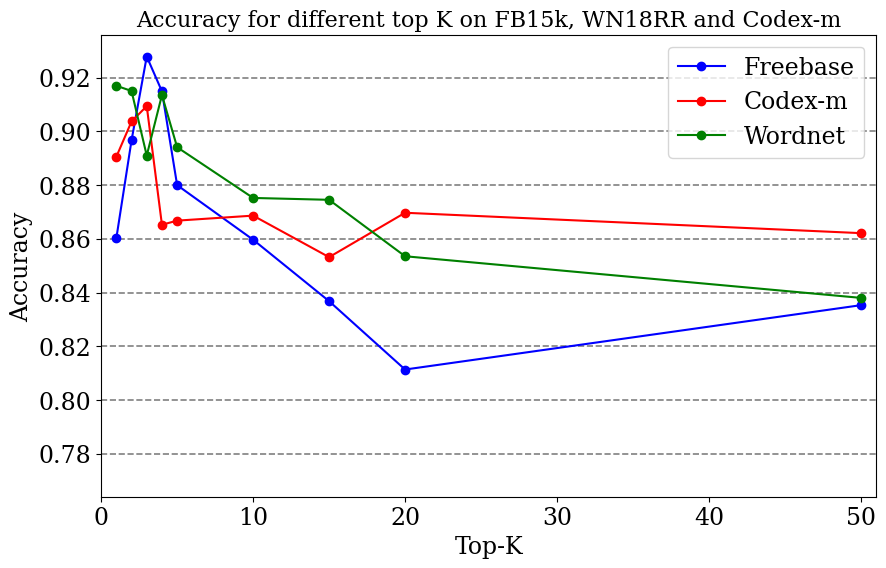

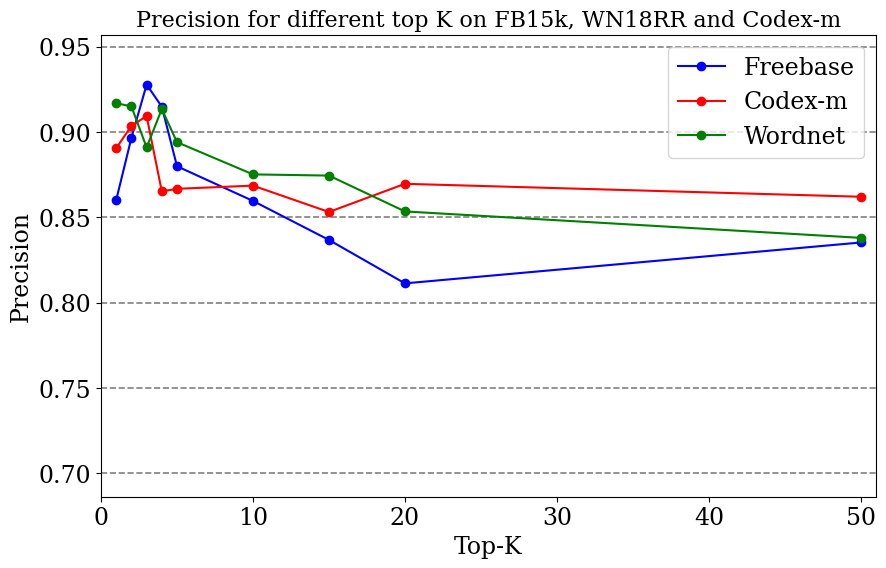

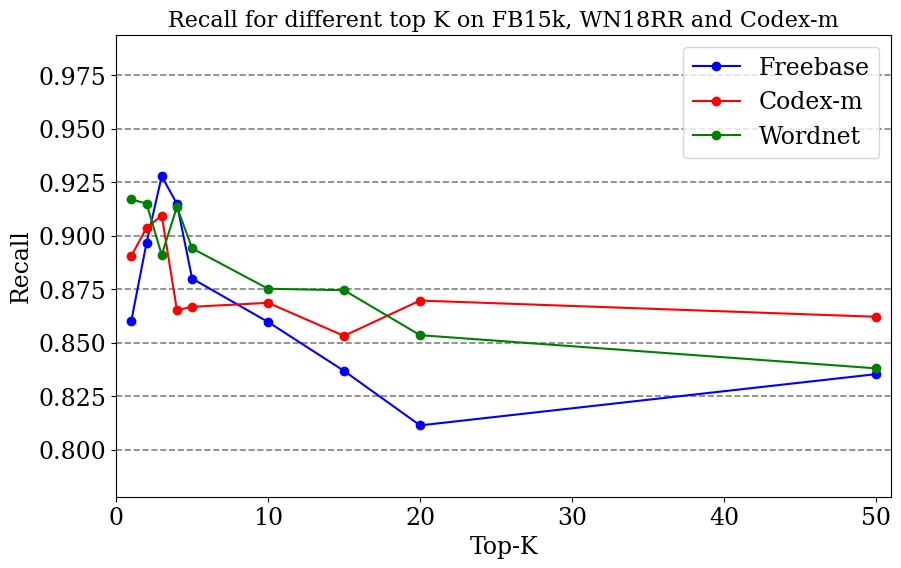

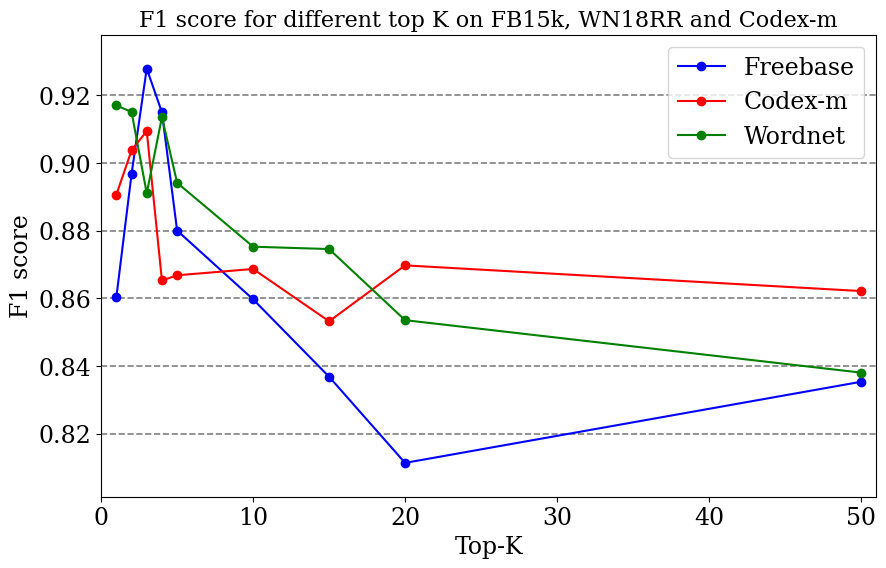

In [103]:
plot_res('Accuracy')
plot_res('Precision')
plot_res('Recall')
plot_res('F1 score')

In [88]:
res_df

,Accuracy,Precision,Recall,F1 score,top_k
2,0.884,0.842857,0.944,0.890566,1
4,0.896,0.841379,0.976,0.903704,2
6,0.902,0.845361,0.984,0.909427,3
3,0.848,0.777070,0.976,0.865248,4
5,0.850,0.779553,0.976,0.866785,5
7,0.850,0.772586,0.992,0.868651,10
8,0.830,0.750760,0.988,0.853195,15
1,0.852,0.776730,0.988,0.869718,20
0,0.842,0.764706,0.988,0.862129,50
